In [1]:
import sys
sys.path.insert(0, '../tools')

%load_ext prov_magics
import provn
from qprov_dictionary import *

In [2]:
def neighborhood(ent, result):
    other, dtext, othertext = var("other dtext otext")
    query = was_derived_from(ent, other, text=dtext) & entity(other, othertext)
    for _ in query:
        result.add(dtext.bound)
        result.add(othertext.bound)
        yield other.bound

def dfs(ent, neigh):
    stack = [ent]
    visited = set()
    text = var("text")
    result = {text.bound for _ in entity(ent, text)} 

    while stack:
        ent = stack.pop()
        for other in neigh(ent, result):
            if other not in visited:
                visited.add(other)
                stack.append(other)
    return result



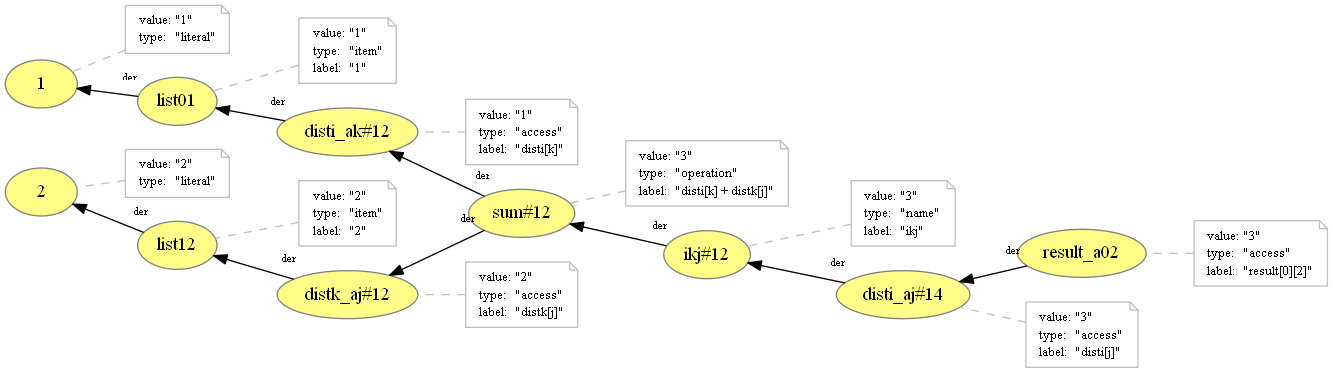

In [3]:
querier.load("../images/prov_dictionary/floydwarshall.provn");
view = "provn png svg pdf"
get_ipython().run_cell_magic(
    "provn",
    "-o {} -e {} -r RL".format("../images/prov_dictionary/query", view),
    '\n'.join(dfs("result_a02", neighborhood))
)